In [12]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
base_dir = '/kaggle/input/faceskindisease/DataSet_FIx/Train'

acne_dir = os.path.join(base_dir, 'Acne')
actinic_dir = os.path.join(base_dir, 'Actinic')
eczema_dir = os.path.join(base_dir, 'Eczema')
rosacea_dir = os.path.join(base_dir, 'Rosacea')

print('Total training Acne images:', len(os.listdir(acne_dir)))
print('Total training Actinic images:', len(os.listdir(actinic_dir)))

print('Total training Eczemaa:', len(os.listdir(eczema_dir)))
print('Total training Rosacea:', len(os.listdir(rosacea_dir)))

Total training Acne images: 200
Total training Actinic images: 200
Total training Eczemaa: 313
Total training Rosacea: 200


In [14]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

def train_val_generators(training_dir, validation_dir):

    train_datagen = ImageDataGenerator(rescale=1./255.)

    train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

    validation_datagen = ImageDataGenerator(rescale=1./255.)

    validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))

    return train_generator, validation_generator

In [15]:
training_dir = '/kaggle/input/faceskindisease/DataSet_FIx/Train'
validation_dir = '/kaggle/input/faceskindisease/DataSet_FIx/Testing'
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 913 images belonging to 4 classes.
Found 554 images belonging to 4 classes.


In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential

mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in mobilenet.layers:
    layer.trainable = False

model = Sequential([
    mobilenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])





In [17]:
model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/15
29/29 [==============================] - 28s 843ms/step - loss: 1.1045 - accuracy: 0.5641 - val_loss: 0.8408 - val_accuracy: 0.6715
Epoch 2/15
29/29 [==============================] - 21s 752ms/step - loss: 0.6070 - accuracy: 0.7678 - val_loss: 0.7877 - val_accuracy: 0.7040
Epoch 3/15
29/29 [==============================] - 21s 735ms/step - loss: 0.4520 - accuracy: 0.8269 - val_loss: 0.7579 - val_accuracy: 0.7166
Epoch 4/15
29/29 [==============================] - 18s 631ms/step - loss: 0.3240 - accuracy: 0.8938 - val_loss: 0.6728 - val_accuracy: 0.7617
Epoch 5/15
29/29 [==============================] - 18s 606ms/step - loss: 0.2401 - accuracy: 0.9376 - val_loss: 0.6417 - val_accuracy: 0.7870
Epoch 6/15
29/29 [==============================] - 21s 742ms/step - loss: 0.1853 - accuracy: 0.9606 - val_loss: 0.5930 - val_accuracy: 0.8069
Epoch 7/15
29/29 [==============================] - 17s 590ms/step - loss: 0.1507 - accuracy: 0.9693 - val_loss: 0.6759 - val_accuracy: 0.7888

Masukkan path file gambar:  /kaggle/input/faceskindisease/DataSet_FIx/Testing/Acne/acne-closed-comedo-003.jpg


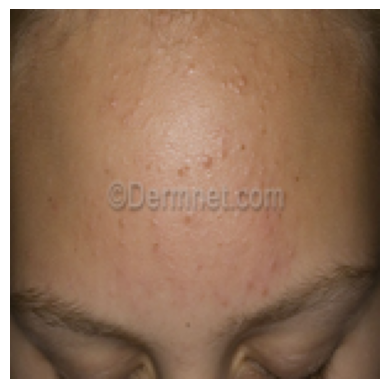

1/1 [==============================] - 2s 2s/step
acne-closed-comedo-003.jpg terdeteksi sebagai: Rosacea


In [18]:
import numpy as np
import os
import shutil
from tensorflow.keras.utils import load_img, img_to_array
from IPython.display import Image
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Mengunggah file gambar
uploaded_file = input("Masukkan path file gambar: ")
uploaded_file_name = os.path.basename(uploaded_file)

# Salin file gambar ke direktori saat ini
shutil.copyfile(uploaded_file, uploaded_file_name)

# Membaca gambar menggunakan PIL
img = PILImage.open(uploaded_file_name)
img = img.resize((150, 150))  # Mengubah ukuran gambar menjadi (150, 150)

plt.imshow(img)
plt.axis('off')
plt.show()

# Mengonversi gambar menjadi array dan melakukan normalisasi
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

# Melakukan prediksi gambar
predictions = model.predict(x)

# Menentukan label kelas
class_labels = ['Acne', 'Rosacea', 'Eksim', 'Actinic']
predicted_class = class_labels[np.argmax(predictions)]

# Menampilkan hasil prediksi
print(f"{uploaded_file_name} terdeteksi sebagai: {predicted_class}")

# Menghapus file yang diunggah
os.remove(uploaded_file_name)

In [19]:
loss, accuracy = model.evaluate(validation_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

18/18 [==============================] - 8s 342ms/step - loss: 3.1947 - accuracy: 0.1354
Validation Loss: 3.194683074951172
Validation Accuracy: 0.13537906110286713


In [21]:
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

18/18 [==============================] - 7s 339ms/step


In [22]:
true_classes = validation_generator.classes

class_labels = list(validation_generator.class_indices.keys())

precision, recall, f1_score, support = precision_recall_fscore_support(
    true_classes, predicted_classes, average='weighted', labels=np.unique(predicted_classes))

accuracy = accuracy_score(true_classes, predicted_classes)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
print('Accuracy:', accuracy)

Precision: 0.31316094451687676
Recall: 0.2231638418079096
F1-Score: 0.0648454138209591
Accuracy: 0.14259927797833935


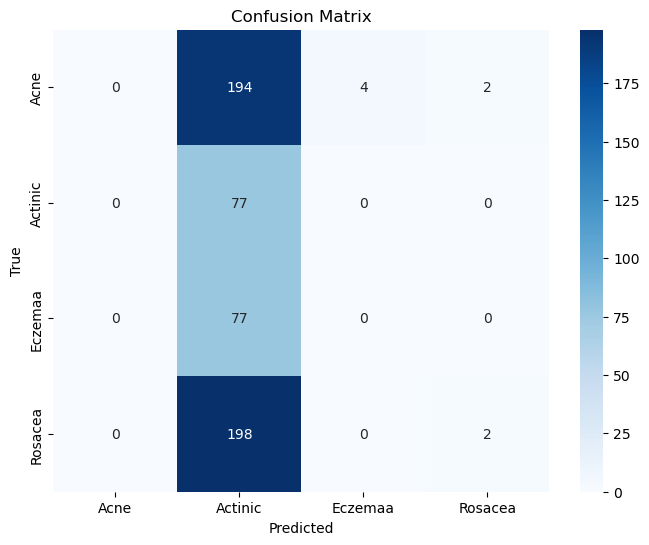

In [23]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

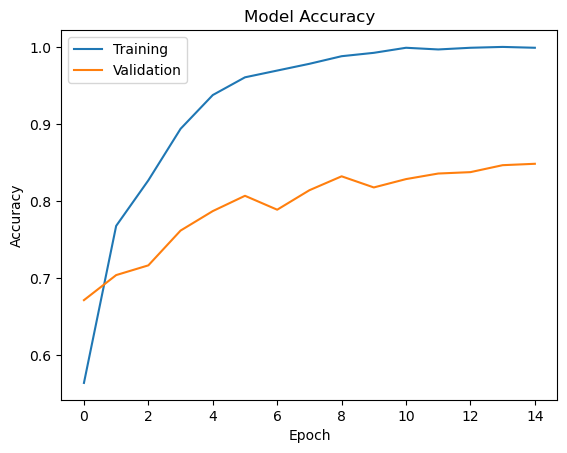

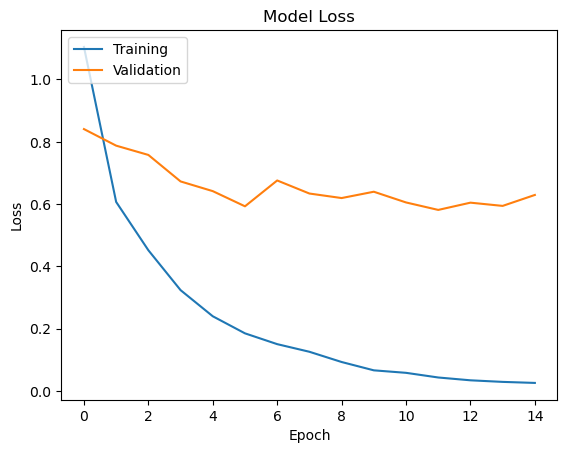

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [25]:
tf.saved_model.save(model, 'path/to/saved_model')

In [ ]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('saved_model')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)
